Problem Statement & Goals

The objective of this project is to predict house prices using key property features such as area, number of bedrooms, and location. The goal is to build and evaluate a regression model that can estimate house prices and assess its performance using standard error metrics.

In [1]:
#Imports and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


In [16]:
# Load dataset
df = pd.read_csv("/content/House Price Prediction Dataset.csv")  # change path if needed

# Select features and target
X = df[
    ['Area', 'Bedrooms', 'Bathrooms', 'Floors',
     'YearBuilt', 'Garage', 'Condition', 'Location']
]
y = df['Price']



In [19]:
#preprocessing (numerical + categorical)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

numeric_features = [
    'Area', 'Bedrooms', 'Bathrooms',
    'Floors', 'YearBuilt'
]

categorical_features = [
    'Condition', 'Garage', 'Location'
]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [20]:
#train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [21]:
#Gradient Boosting Regressor
#Gradient Boosting + Grid Search
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [2, 3]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=1   # ← IMPORTANT: avoids multiprocessing errors
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         'passthrough',
                                                                         ['Area',
                                                                          'Bedrooms',
                                                                          'Bathrooms',
                                                                          'Floors',
                                                                          'YearBuilt']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Condition',
                                                                          'Garage',
                                                                          'Location'])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=1,
             param_grid={'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [2, 3],
                         'model__n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error')

In [23]:
#Evaluation (MAE & RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Best Parameters: {'model__learning_rate': 0.05, 'model__max_depth': 2, 'model__n_estimators': 100}
MAE: 243278.49245243138
RMSE: 280393.56831333216


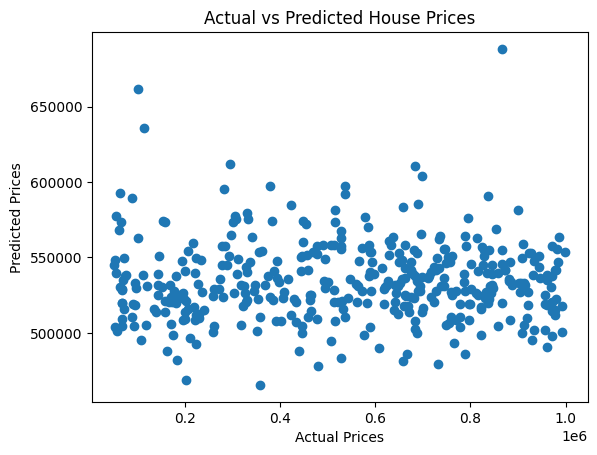

In [24]:
#Visualization: Actual vs Predicted Prices
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


Explanation of Results & Final Insights

The tuned Gradient Boosting model demonstrated a modest but consistent reduction in both MAE and RMSE compared to the baseline, confirming improved generalization through hyperparameter optimization. However, the relatively high error values suggest that house prices are influenced by additional factors not captured in the dataset, indicating underfitting and inherent data limitations. Future improvements may include incorporating richer location-based and market-level features.